## importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## importing data

In [2]:
file_path = 'C:/Users/ankit/Documents/sydney_rain prediction.xlsx'

In [3]:
df = pd.read_excel(file_path)

## Handling missing values

In [4]:
X = df.drop(['RainTomorrow', 'Date'], axis=1)  # Drop non-numeric and non-relevant columns
y = df['RainTomorrow']

In [5]:
X = X.fillna(X.mean())


## converting non numeric into numeric

In [6]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [7]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


## Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)
bagging_model.fit(X_train, y_train)
y_bagging_pred = bagging_model.predict(X_test)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [13]:
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)
boosting_model.fit(X_train, y_train)
y_boosting_pred = boosting_model.predict(X_test)

# Evaluate models

In [14]:
models = {
    'Decision Tree': y_dt_pred,
    'Random Forest': y_rf_pred,
    'Bagging': y_bagging_pred,
    'Boosting': y_boosting_pred
}

## predicting

In [15]:
for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

In [16]:
print(f'\n{name} Model:')


Boosting Model:


In [17]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [18]:
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[406  78]
 [ 79 105]]


In [19]:
print('Classification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.84      0.84       484
         Yes       0.57      0.57      0.57       184

   micro avg       0.76      0.76      0.76       668
   macro avg       0.71      0.70      0.71       668
weighted avg       0.76      0.76      0.76       668



## Plot confusion matrix

In [24]:
plt.figure(figsize=(6, 4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

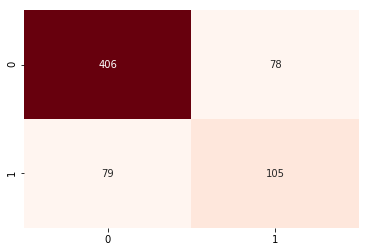

In [30]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)

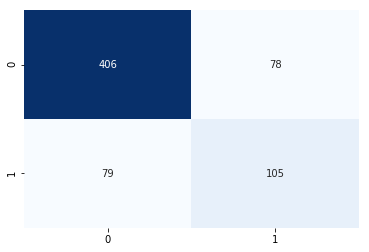

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

Text(0.5, 1.0, 'Boosting Confusion Matrix')

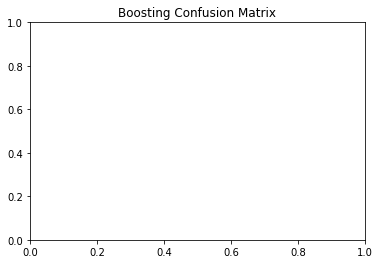

In [26]:
plt.title(f'{name} Confusion Matrix')

In [28]:
plt.show()

## 1. **Problem statment**

## Here are some main points and perspectives regarding the problem statement from my point of view:

* Features Selection
* Data Quality
* Evaluation Metrics
* Continuous Improvement

## 2. What will be your approach to solving this task?


### Here's a general outline of the steps i take:

* Data Collection
* Understanding the Problem
* Data Splitting:
* Model Evaluation
* Continuous Improvement

## 3. What were the available ML model options you had to perform this task?


* Boosting Model
* PLOTS

## 4. these steps i can take to improve this selected model’s performance even further?

* Data Cleaning

1.Handle Outliers
2.Address Missing Values

* Model Interpretability 
* Normalization or Scaling: